In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
#!ln -s /content/gdrive/My\ Drive/ /mydrive

In [37]:
%cd /mydrive/yolov4_tiny_dog_cat

/content/gdrive/My Drive/yolov4_tiny_dog_cat


In [38]:
# download darknet folder - for windows use darknet of AlexeyAB and for linux download darknet of pjreddie
# uncomment the below line to download darknet folder. I already have so commented it

#!git clone https://github.com/AlexeyAB/darknet

Changes to do in yolov4 architecture as per your dataset Open darknet folder -> cfg folder -> yolov4-tiny.cfg (Delete everything else)

change batch=1 from batch=64

change subdivisions=1 from subdivisions=16

width=608 #416 height=608 #416

Next is max_batches.This parameter is very very important.The thing to remember here is that minimum batch value would be 6000 ( if you have 1 class or 2 classes or 3 classes.)

#### In our case we have 4 classes. So max_batches would be 4*2000 = 8000 i.e 8000 would be the max_batches.

#### Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch
#### steps are steps=7200,6400  (90% of 8000 and 80% of 8000)


Steps are also important. There are 2 steps:Ist step should be 90% of the max_batch value. And 2nd step would be the 80% of the max_batch steps are steps=5400,4800 (90% of 6000 and 80% of 6000)

We have 3 YOLO layers for 3 different scales.

Showing you a demo below. Just see the [Yolo] layer. Above [YOLO] layer, we have [convolutional] layer. Change the number of filters as per your output classes as per this calculation (classes+5)3 = (2+5)3 = 21

In [39]:
# Upload your dataset folder inside a data folder of darknet.

# Now let's dicide our dataset in train and tes using below script


import glob
import os
import numpy as np
import sys

current_dir = "/mydrive//yolov4_tiny_dog_cat//darknet//data//ts/"
split_pct = 10;
file_train = open("darknet/data/train.txt", "w")  
file_val = open("darknet/data/test.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        if counter == index_test:
                counter = 1
                file_val.write(current_dir + "/" + title + '.jpg' + "\n")
        else:
                file_train.write(current_dir + "/" + title + '.jpg' + "\n")
                counter = counter + 1
file_train.close()
file_val.close()


In [40]:
# Inside your data folder, you will train.txt and test.txt file now.
# Now create 2 files in data folder - obj.data and obj.names

00137.txt: 
1 0.6308823529411764 0.4425 0.05 0.075

00120.txt: 
0 0.08161764705882353 0.3675 0.07794117647058824 0.1275

00281.txt: 
1 0.7345588235294118 0.4725 0.025 0.0375
0 0.7356617647058824 0.510625 0.02426470588235294 0.04125

00202.txt: 
3 0.49963235294117647 0.4275 0.03308823529411765 0.0575
3 0.058823529411764705 0.42375 0.03529411764705882 0.06



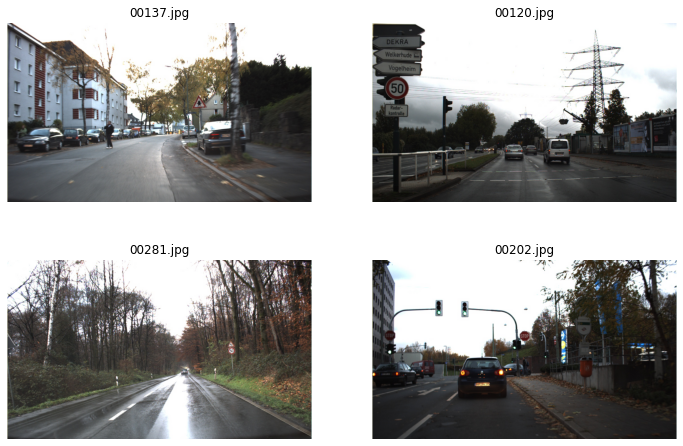

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

In [42]:
pwd

'/content/gdrive/My Drive/yolov4_tiny_dog_cat'

In [43]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights
# Run the following command to download the YOLOv4 pre-trained weights file.
%cd darknet/data/

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

/content/gdrive/My Drive/yolov4_tiny_dog_cat/darknet/data


In [44]:
%cd ..

/content/gdrive/My Drive/yolov4_tiny_dog_cat/darknet


In [45]:
#%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile




In [46]:
#!make


In [47]:
!chmod +x ./darknet

In [48]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg data/yolov4-tiny.weights -dont_show 

Streaming output truncated to the last 5000 lines.
 total_bbox = 300887, rewritten_bbox = 1.962531 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.928376), count: 1, class_loss = 0.001287, iou_loss = 8.901184, total_loss = 8.902471 
 total_bbox = 300888, rewritten_bbox = 1.962524 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.638429), count: 1, class_loss = 0.002351, iou_loss = 20.862736, total_loss = 20.865086 
 total_bbox = 300889, rewritten_bbox = 1.962518 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000

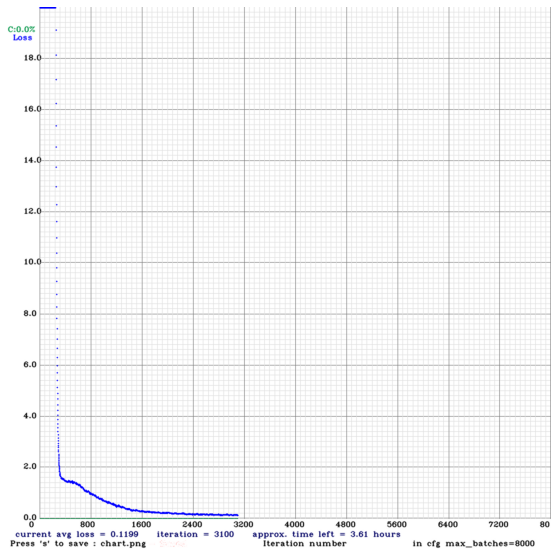

In [49]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [52]:
img_path = "data/test.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom_test.cfg data/yolov4-tiny-custom_3000.weights {img_path} -dont-show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

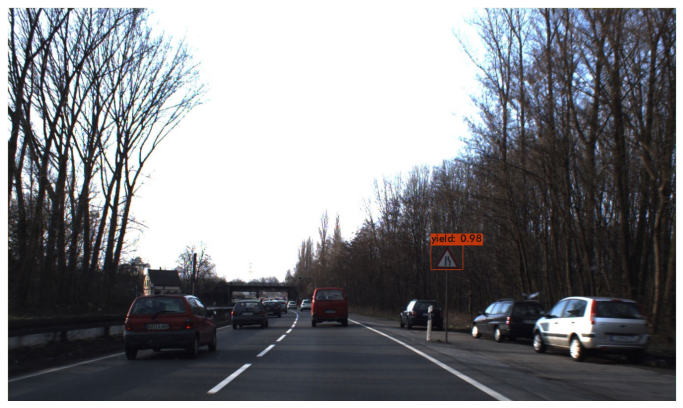

In [53]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)